# Analysis of optogenetic stimulus generator test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bluepy import Cell, Synapse, Circuit, Simulation
import os
import json
from helper_functions import load_sim_results, get_activity, plot_PSTH

In [2]:
sims_file = '/gpfs/bbp.cscs.ch/data/scratch/proj83/bbp_workflow/ab3f0887-44bf-4f37-a169-c7b7e6a967e7/analyses/simulations.pkl'
# sims_file = '/gpfs/bbp.cscs.ch/data/scratch/proj83/bbp_workflow/8336f8f4-8256-4207-bbe7-d61c9455b5fa/analyses/simulations.pkl'
sims = pd.read_pickle(sims_file)

In [3]:
# Load results into dataframes
blank_rates_table, stim_rates_table, opto_rates_table, blue_configs, stim_configs, opto_configs = load_sim_results(sims)
rel_rates_table = opto_rates_table / blank_rates_table

/gpfs/bbp.cscs.ch/ssd/apps/hpc/jenkins/deploy/libraries/2021-01-06/linux-rhel7-x86_64/gcc-9.3.0/py-numpy-1.19.4-upzqna/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


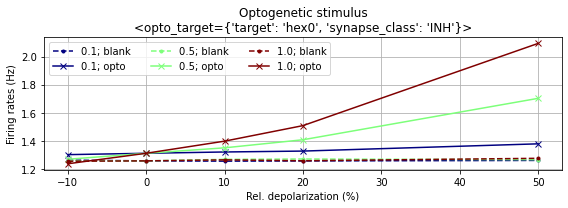

In [5]:
# Plot firing rates vs. depolarization
sub_levels = np.unique(sims.index.get_level_values('opto_sub'))
sub_colors = plt.cm.jet(np.linspace(0, 1, len(sub_levels)))
plt.figure(figsize=(8, 3))
for sub_idx, sub in enumerate(sub_levels):
        sim_sel = sims.index.get_level_values('opto_sub') == sub
        depol = opto_rates_table[sim_sel].index.get_level_values('opto_depol_pct')
        plt.plot(depol, blank_rates_table[sim_sel]['FullTarget'], '.--', color=sub_colors[sub_idx, :], label=f'{sub}; blank')
        plt.plot(depol, opto_rates_table[sim_sel]['FullTarget'], 'x-', color=sub_colors[sub_idx, :], label=f'{sub}; opto')
plt.xlabel('Rel. depolarization (%)')
plt.ylabel('Firing rates (Hz)')
plt.legend(ncol=len(sub_levels))
plt.grid()
plt.title(f'Optogenetic stimulus\n<opto_target={opto_configs[-1]["cfg"]["opto_target"]}>')
plt.tight_layout()
plt.savefig('firing_rates.png', dpi=300)
plt.show()

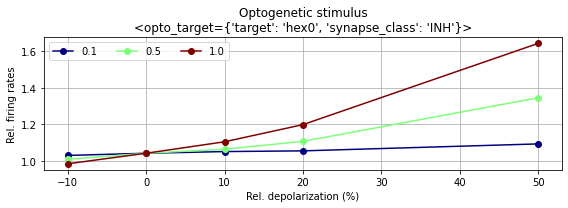

In [9]:
# Plot rel. firing rates vs. depolarization
sub_levels = np.unique(sims.index.get_level_values('opto_sub'))
sub_colors = plt.cm.jet(np.linspace(0, 1, len(sub_levels)))
plt.figure(figsize=(8, 3))
for sub_idx, sub in enumerate(sub_levels):
        sim_sel = sims.index.get_level_values('opto_sub') == sub
        depol = opto_rates_table[sim_sel].index.get_level_values('opto_depol_pct')
        plt.plot(depol, rel_rates_table[sim_sel]['FullTarget'], 'o-', color=sub_colors[sub_idx, :], label=f'{sub}')
plt.xlabel('Rel. depolarization (%)')
plt.ylabel('Rel. firing rates')
plt.legend(ncol=len(sub_levels))
plt.grid()
plt.title(f'Optogenetic stimulus\n<opto_target={opto_configs[-1]["cfg"]["opto_target"]}>')
plt.tight_layout()
plt.savefig('rel_firing_rates.png', dpi=300)
plt.show()

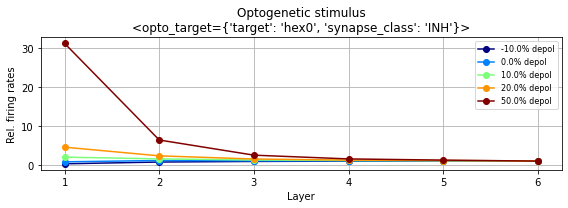

In [10]:
# Plot rel. firing rates vs. injection targets (depths)
sel_idx = sims.index.get_level_values('opto_sub') == 1.0
sims_sel = sims[sel_idx]
rel_rates_sel = rel_rates_table[sel_idx]
sims_sel = sims_sel.index.get_level_values('opto_depol_pct')
sim_colors = plt.cm.jet(np.linspace(0, 1, sims_sel.shape[0]))
num_layers = 6
layer_targets = [f'FullTargetL{lidx + 1}' for lidx in range(num_layers)]
plt.figure(figsize=(8, 3))
for sidx in range(sims_sel.shape[0]):
    plt.plot(np.arange(1, num_layers + 1), rel_rates_sel.iloc[sidx][layer_targets], 'o-', color=sim_colors[sidx, :], label=f'{depol[sidx]}% depol') #str(rel_rates_sel.index[sidx])
plt.xlabel('Layer')
plt.ylabel('Rel. firing rates')
plt.grid()
plt.title(f'Optogenetic stimulus\n<opto_target={opto_configs[-1]["cfg"]["opto_target"]}>')
plt.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.savefig('rel_layer_firing_rates.png', dpi=300)
plt.show()

/gpfs/bbp.cscs.ch/ssd/apps/hpc/jenkins/deploy/libraries/2021-01-06/linux-rhel7-x86_64/gcc-9.3.0/py-numpy-1.19.4-upzqna/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


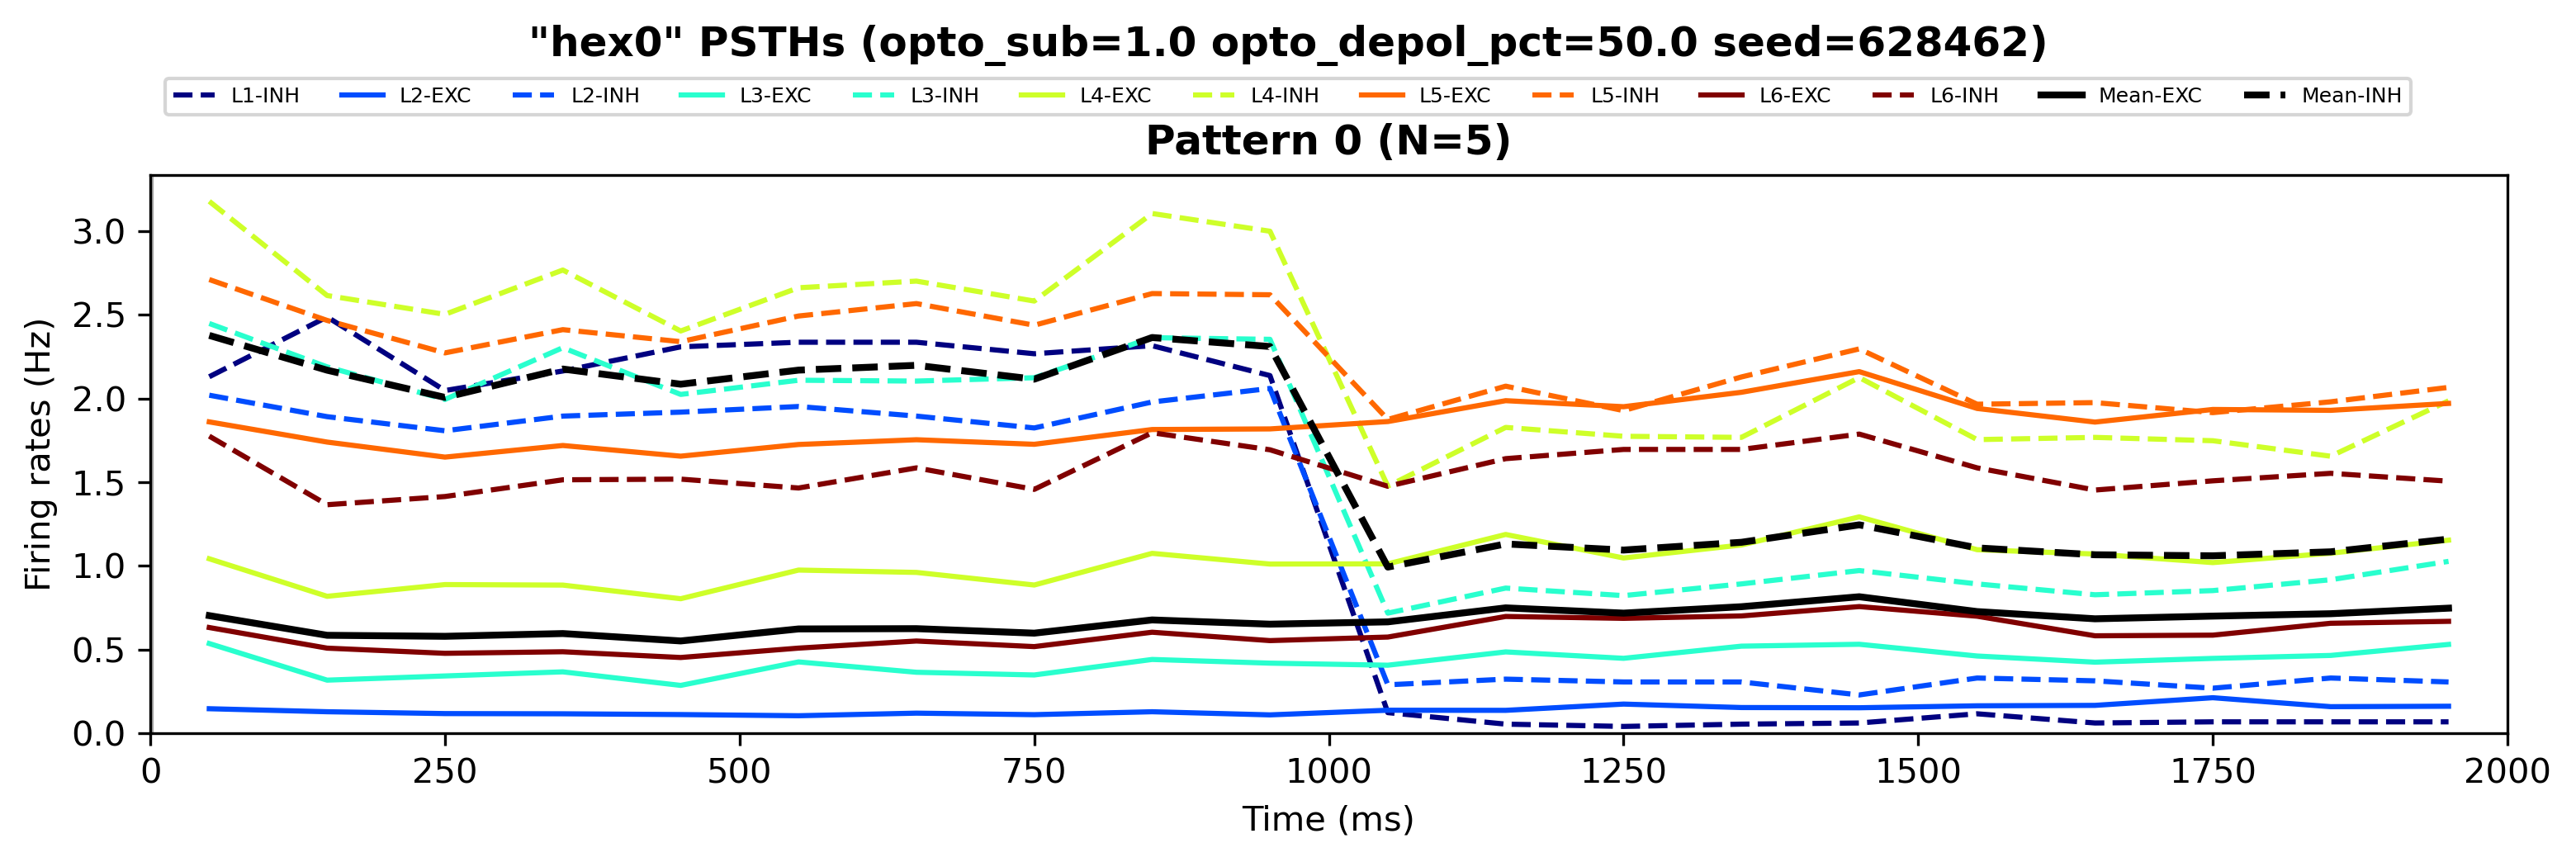

In [4]:
# for idx, blue_config in enumerate(sims):
#     plot_PSTH(blue_config, psth_bin_size=100, psth_interval=None, psth_target='hex0', label=' '.join([f'{i[0]}={i[1]}' for i in zip(sims.index.names, sims.index[idx])]))

idx = 14
blue_config = sims.iloc[idx]
plot_PSTH(blue_config, psth_bin_size=100, psth_interval=None, psth_target='hex0', label=' '.join([f'{i[0]}={i[1]}' for i in zip(sims.index.names, sims.index[idx])]), save_fn=f'psth_{idx}.png')

/gpfs/bbp.cscs.ch/ssd/apps/hpc/jenkins/deploy/libraries/2021-01-06/linux-rhel7-x86_64/gcc-9.3.0/py-numpy-1.19.4-upzqna/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


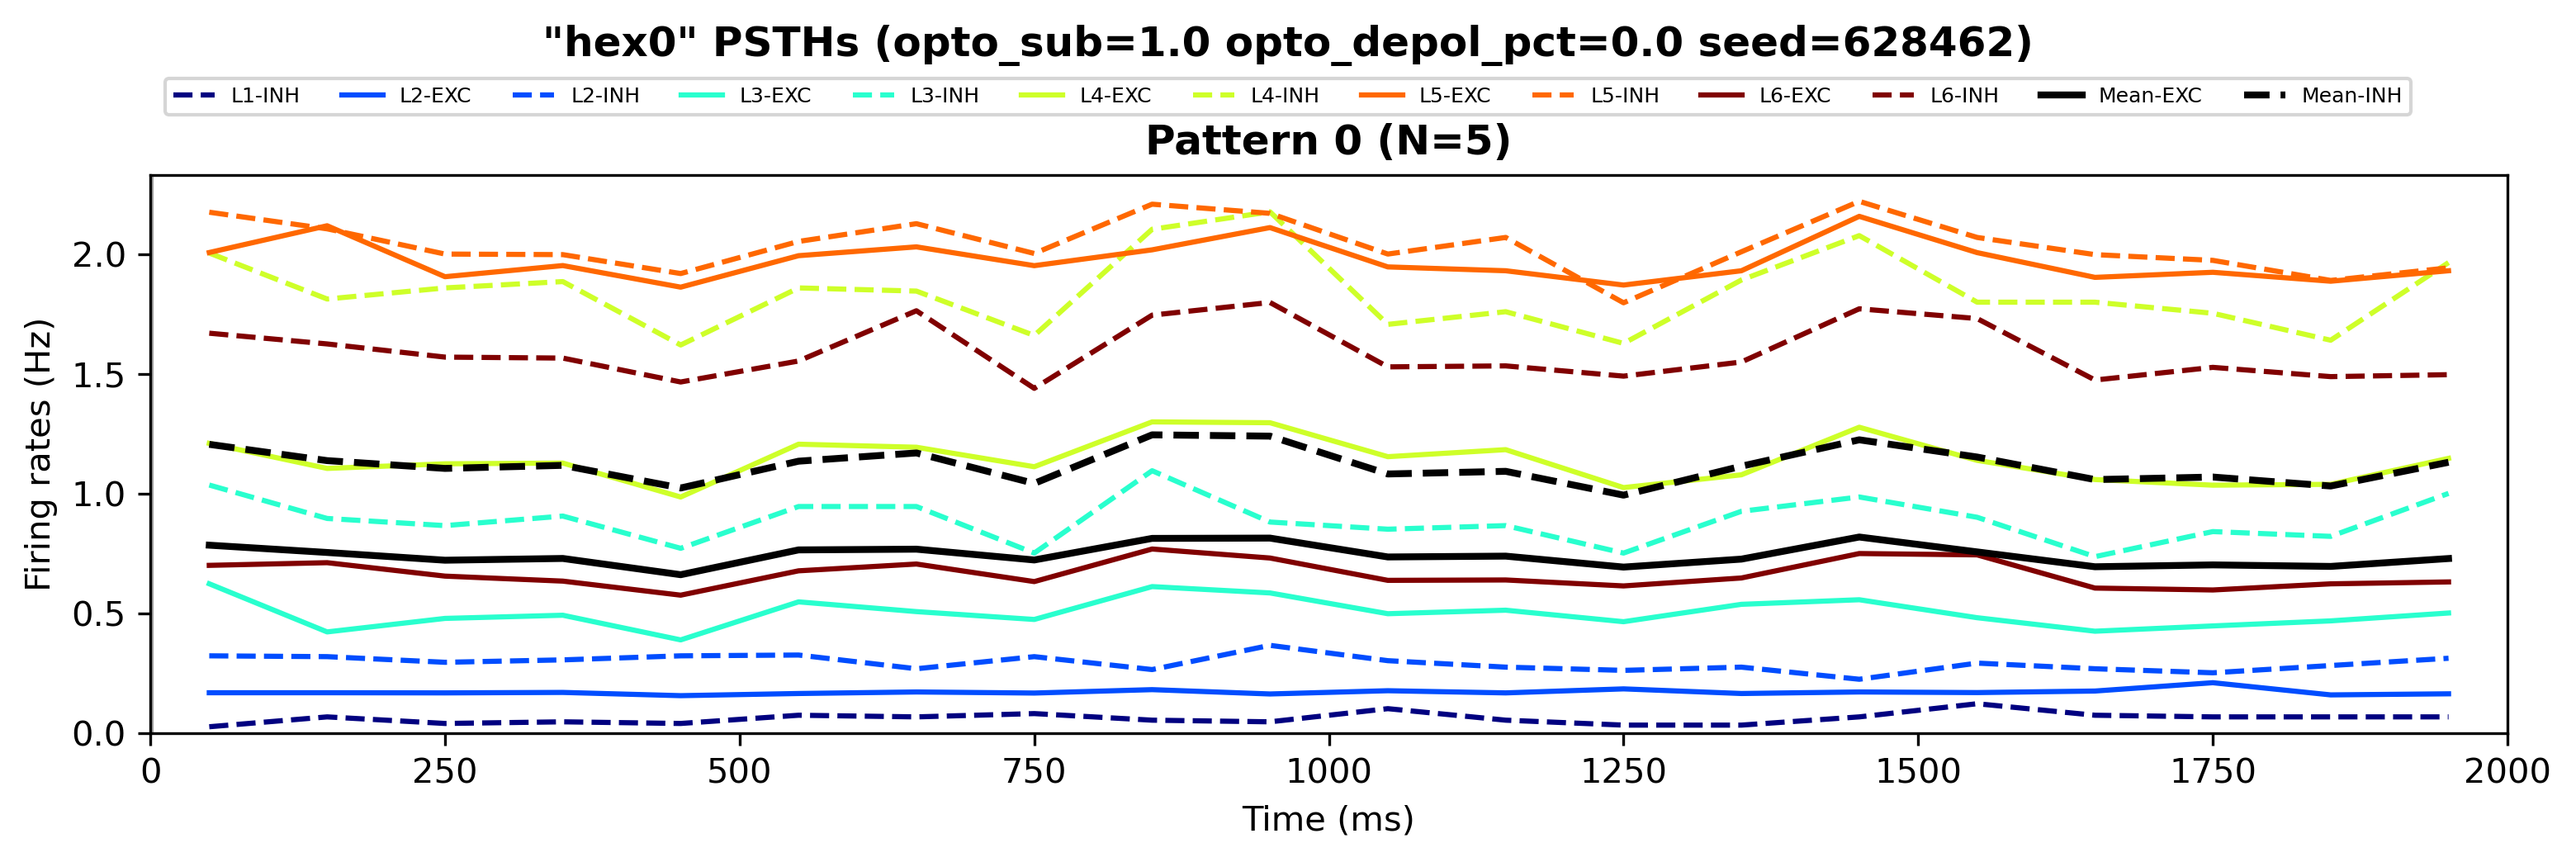

In [43]:
idx = 11
blue_config = sims.iloc[idx]
plot_PSTH(blue_config, psth_bin_size=100, psth_interval=None, psth_target='hex0', label=' '.join([f'{i[0]}={i[1]}' for i in zip(sims.index.names, sims.index[idx])]))#, save_fn=f'psth_{idx}.png')

In [73]:
# Voltage traces
target = 'hex0'
syn_class = 'INH'
cell_count = 100 # Number of cells to select

sims_sel = sims[sims.index.get_level_values('opto_sub') == 1.0]
depol = sims_sel.index.get_level_values('opto_depol_pct').to_numpy()

c = Circuit(sims_sel.iloc[0])
gids = c.cells.ids(target)
gids = np.intersect1d(gids, c.cells.ids({'synapse_class': syn_class}))
if len(gids) > cell_count:
    gids = np.random.choice(gids, cell_count, replace=False)

v_traces = []
for blue_config in sims_sel:
    sim = Simulation(blue_config)
    soma_report = sim.report('soma')
    v_traces.append(soma_report.get(gids=gids, t_step=1.0))

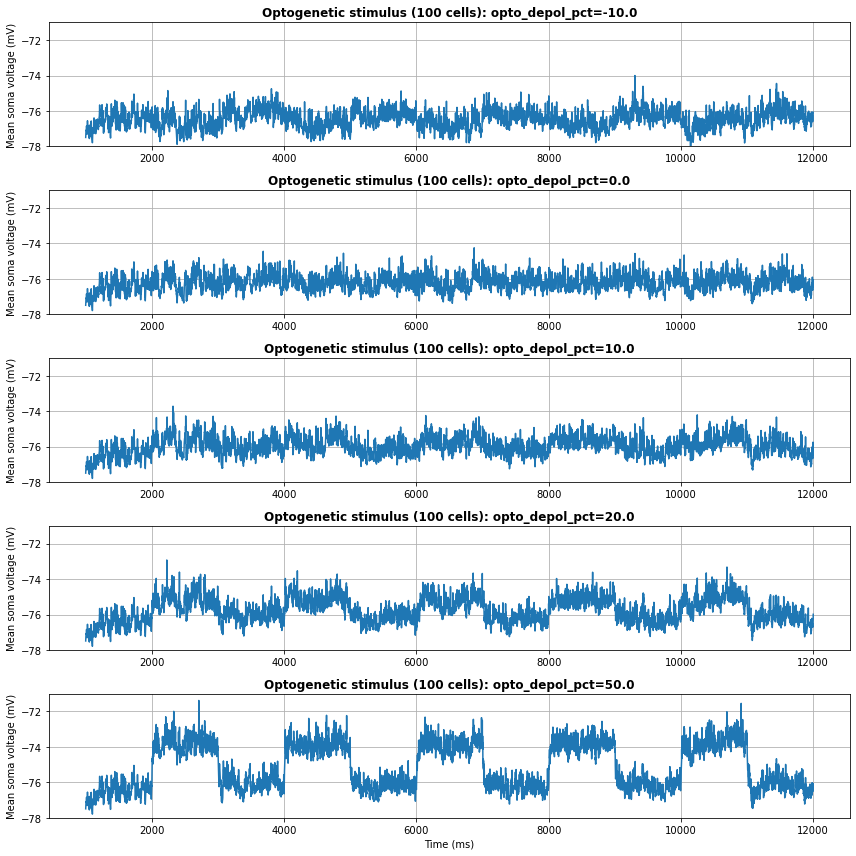

In [102]:
v_lim = [-78, -71]
plt.figure(figsize=(12, 12))
for idx, v_tr in enumerate(v_traces):
    plt.subplot(len(v_traces), 1, idx + 1)
    t = v_tr.index
    v = v_tr.to_numpy().T
#     plt.plot(t, v.T, color='grey', linewidth=0.2)
    plt.plot(t, np.mean(v, 0))
    plt.ylim(v_lim)
    plt.grid()
    plt.ylabel(f'Mean soma voltage ({soma_report.meta["data_unit"]})')
    plt.title(f'Optogenetic stimulus ({len(gids)} cells): opto_depol_pct={depol[idx]}', fontweight='bold')
plt.xlabel(f'Time ({soma_report.meta["time_unit"]})')
plt.tight_layout()
plt.savefig('opto_voltage.png', dpi=300)
plt.show()